In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [3]:
train_generator = train_datagen.flow_from_directory(
    'data/training_set/',
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    'data/test_set/',
    target_size=(64, 64),
    batch_size=64,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [6]:
cnn = Sequential()
cnn.add(Conv2D(filters=32, input_shape=[64, 64, 3], kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2, strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))

In [7]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
history = cnn.fit(x=train_generator, validation_data=test_generator, epochs=20)

Epoch 1/20
125/125 [==============================] - 68s 544ms/step - loss: 0.6767 - accuracy: 0.5580 - val_loss: 0.6020 - val_accuracy: 0.6735
Epoch 2/20
125/125 [==============================] - 27s 218ms/step - loss: 0.5918 - accuracy: 0.6791 - val_loss: 0.5550 - val_accuracy: 0.7245
Epoch 3/20
125/125 [==============================] - 28s 221ms/step - loss: 0.5403 - accuracy: 0.7260 - val_loss: 0.5046 - val_accuracy: 0.7540
Epoch 4/20
125/125 [==============================] - 30s 241ms/step - loss: 0.5053 - accuracy: 0.7469 - val_loss: 0.4965 - val_accuracy: 0.7605
Epoch 5/20
125/125 [==============================] - 30s 238ms/step - loss: 0.4962 - accuracy: 0.7605 - val_loss: 0.4896 - val_accuracy: 0.7770
Epoch 6/20
125/125 [==============================] - 31s 245ms/step - loss: 0.4833 - accuracy: 0.7632 - val_loss: 0.5456 - val_accuracy: 0.7265
Epoch 7/20
125/125 [==============================] - 31s 248ms/step - loss: 0.4622 - accuracy: 0.7801 - val_loss: 0.5558 - val_ac

In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

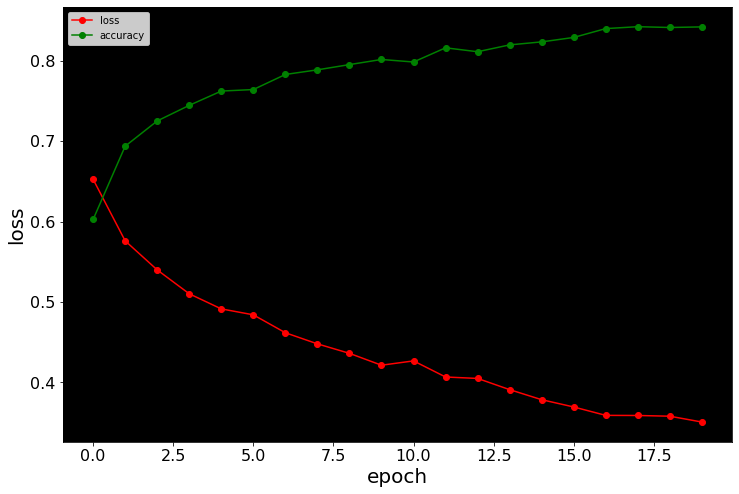

In [11]:
plt.figure(figsize=(12,8))
plt.gca().set_facecolor('k')
plt.plot(history.history['loss'], 'o-', color='red', label='loss')
plt.plot(history.history['accuracy'], 'o-', color='green', label='accuracy')
plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.legend();

In [12]:
import numpy as np
from keras.preprocessing import image

In [13]:
print(train_generator.class_indices)

{'cats': 0, 'dogs': 1}


In [14]:
test_image = image.load_img('data/single_prediction/cat_or_dog_1.jpg', target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
print(result)

[[1.]]
